# Gerekli Kütüphanelerin ve Veri Setinin Yüklenmesi

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math
import os
import folium
from sklearn.metrics import davies_bouldin_score
for dirname, _, filenames in os.walk('/kaggle/input/nyc-taxi-trip-duration/NYC.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Projemin konusu: K-Means kullanarak, Lokasyonlara göre aynı bölgeden başlayan ve biten yolculukları kümeleme

In [2]:
sns.set(style="whitegrid")

df = pd.read_csv('/kaggle/input/nyc-taxi-trip-duration/NYC.csv')
print(f"Veri boyutu: {df.shape}")
df.head(8)


Veri boyutu: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551


In [3]:
# Eksik değerlerin kontrolü
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [4]:
# Veri tiplerini ve genel bilgileri göster
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
# Özet istatistikler
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# Görselleştirme

Pickup ve dropoff koordinatlarını harita üzerinde incelemek istedim. Fakat buradaki veriler koordinat olduğu için hepsinin birbirine yakın olması ve grafikte bir yerde toplanmaları aşırı normal

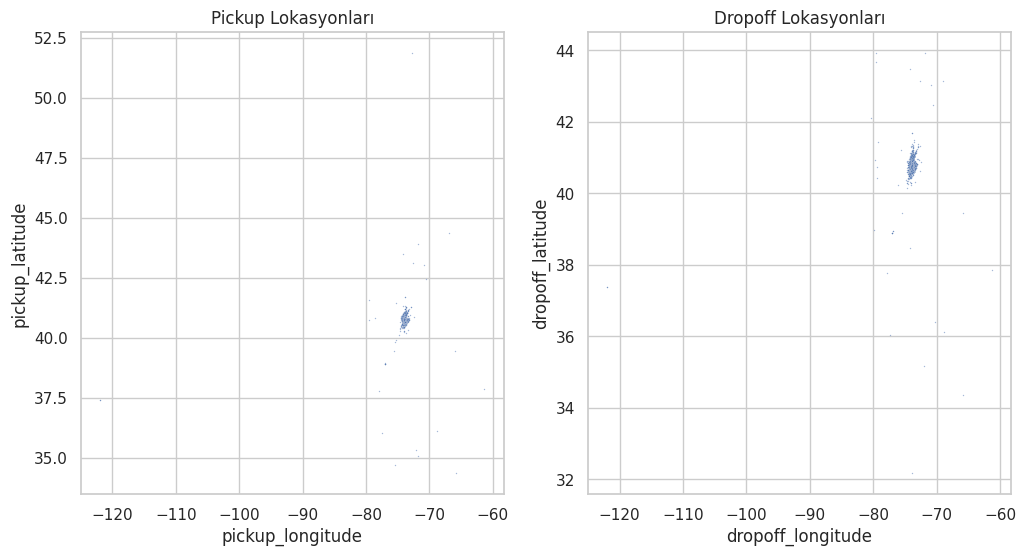

In [6]:
# Pickup ve Dropoff lokasyonlarının dağılımı
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, s=1, alpha=0.5)
plt.title("Pickup Lokasyonları")
plt.subplot(1, 2, 2)
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, s=1, alpha=0.5)
plt.title("Dropoff Lokasyonları")
plt.show()


GPT yardımıyla New York City sınırlarının tahmini koordinatlarını aldım. Bu sınırlar dışındaki noktaları bulmak ve anormal koordinatları ayıklamak gerekebilir. Şehir sınırlarına uymayan noktalar hatalı olabilir ya da bazı sürüşler şehir dışına doğru olabilir bu çok normal bir şey ama yine de veri setinden çıkartalım.

In [7]:
# New York City sınırları (tahmini)
nyc_min_longitude, nyc_max_longitude = -74.05, -73.75
nyc_min_latitude, nyc_max_latitude = 40.63, 40.85

# NYC sınırları içinde olmayanları filtreleme
anormal_veriler = df[
    (df['pickup_longitude'] < nyc_min_longitude) | 
    (df['pickup_longitude'] > nyc_max_longitude) |
    (df['pickup_latitude'] < nyc_min_latitude) | 
    (df['pickup_latitude'] > nyc_max_latitude)
]

print(f"Anormal koordinatlara sahip satır sayısı: {anormal_veriler.shape[0]}")

# Temiz veriyi filtreleme
df_cleaned = df[
    (df['pickup_longitude'] >= nyc_min_longitude) & 
    (df['pickup_longitude'] <= nyc_max_longitude) &
    (df['pickup_latitude'] >= nyc_min_latitude) & 
    (df['pickup_latitude'] <= nyc_max_latitude)
]


Anormal koordinatlara sahip satır sayısı: 1880


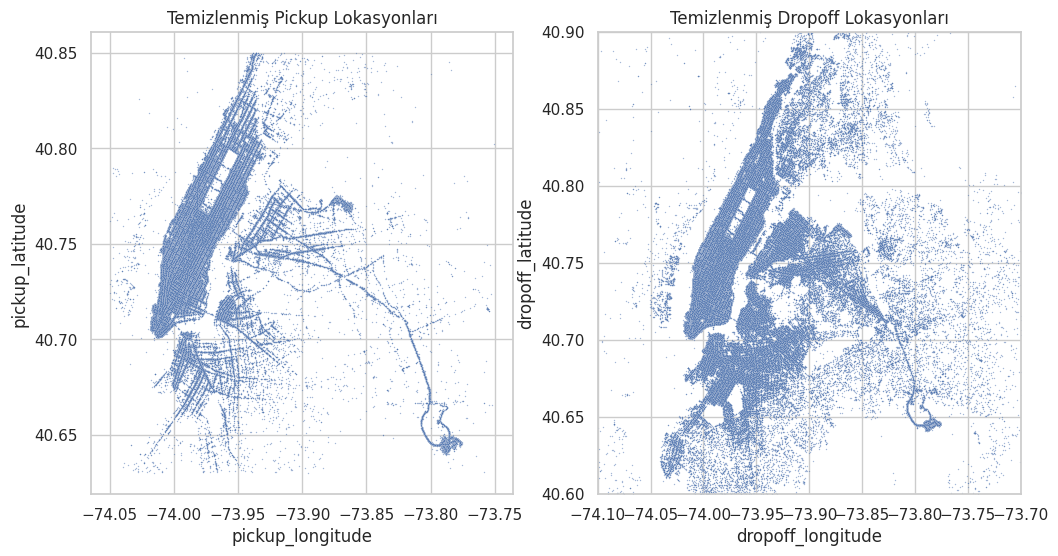

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df_cleaned, s=1, alpha=0.5)
plt.title("Temizlenmiş Pickup Lokasyonları")
plt.subplot(1, 2, 2)
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df_cleaned, s=1, alpha=0.5)
plt.title("Temizlenmiş Dropoff Lokasyonları")
plt.xlim([-74.1, -73.7])  # X eksen aralığını daraltma
plt.ylim([40.6, 40.9])    # Y eksen aralığını daraltma

plt.show()


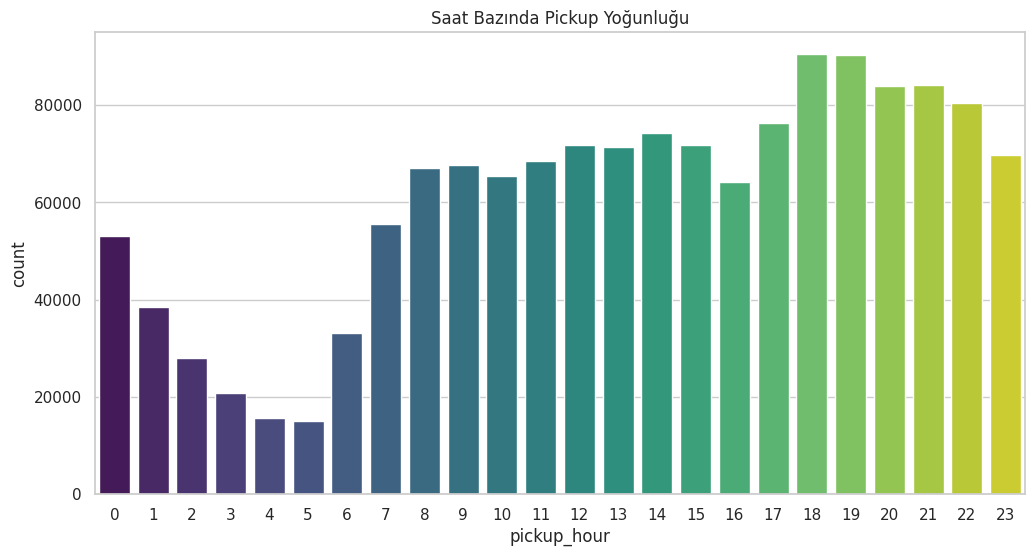

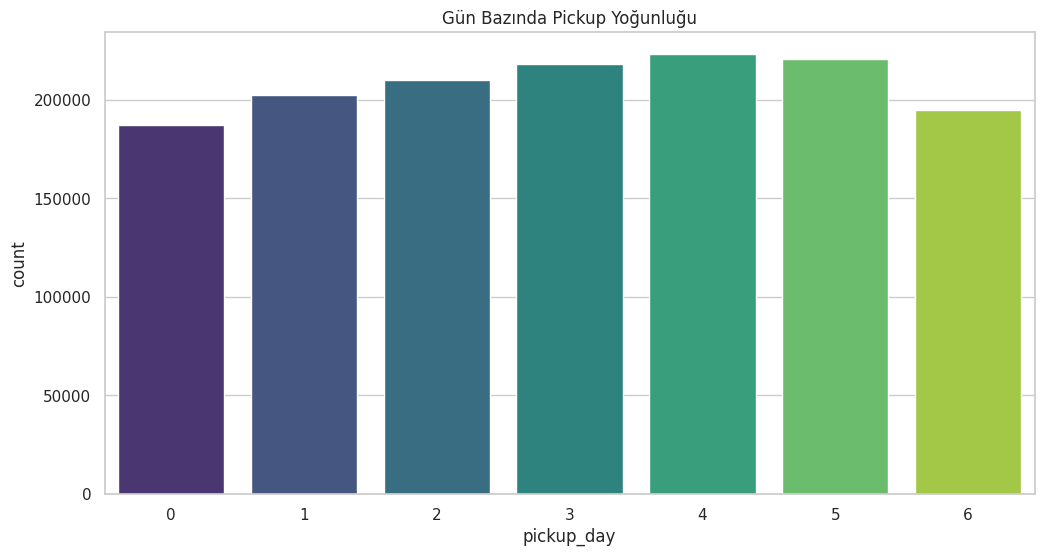

In [12]:
# Tarih formatına dönüştürme
df_cleaned.loc[:, 'pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])

# Saat ve gün bazında dağılım
df_cleaned.loc[:, 'pickup_hour'] = df_cleaned['pickup_datetime'].dt.hour
df_cleaned.loc[:, 'pickup_day'] = df_cleaned['pickup_datetime'].dt.weekday

# Saat bazında yolculuk sayıları
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=df_cleaned, palette='viridis')
plt.title("Saat Bazında Pickup Yoğunluğu")
plt.show()

# Gün bazında yolculuk sayıları
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_day', data=df_cleaned, palette='viridis')
plt.title("Gün Bazında Pickup Yoğunluğu")
plt.show()


# Veri Hazırlama
Verilerimi görselleştirdiğime göre K-Means için verilerimi hazırlıyorum. K-Means için sadece pickup_longitude, pickup_latitude, dropoff_longitude, ve dropoff_latitude sütunlarını kullanacağım. Bunun dışındaki verilere şimdilik ihtiyacım yok. 

Küme sayısını belirlemek için Elbow yöntemini kullanacağım. Ondan sonra uygun küme sayısı ile K-Means kümeleme işlemini yapacağım.

In [13]:
# Pickup ve dropoff lokasyonlarının yer aldığı sütunları seçme
coordinates = df_cleaned[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
coordinates.head(8)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520
5,-73.982857,40.742195,-73.992081,40.749184
6,-73.969017,40.757839,-73.957405,40.765896
7,-73.969276,40.797779,-73.922470,40.760559


In [15]:
# 
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Elbow Yöntemi 

Elbow yönteminde, her küme sayısına karşılık gelen toplam hata kareler toplamı hesaplanır. Bu, her bir veri noktasının kendi küme merkezine olan uzaklıklarının karelerinin toplamını ifade eder. Küme sayısı arttıkça, bu değer azalma eğilimindedir.

Dirsek noktasının seçimi: Elbow yönteminde dikkat edilmesi gereken en önemli şey, grafik üzerinde belirgin bir dirsek noktasını bulmaktır. Bu nokta, küme sayısının arttırılmasının ek fayda sağlamadığı, yani SSE'nin çok az bir şekilde azaldığı noktadır. Bu noktadan sonra daha fazla küme eklemek, modelin karmaşıklığını arttırsa da anlamlı bir iyileşme sağlamaz.
Çok fazla küme seçilirse, veri aşırı kümelenebilir ve gereksiz bölümlenme olur . Az sayıda küme seçilirse ise verinin doğal yapısı yeterince yakalanmamış olabilir. Dirsek noktası bu iki durumu dengelemeye çalışır.


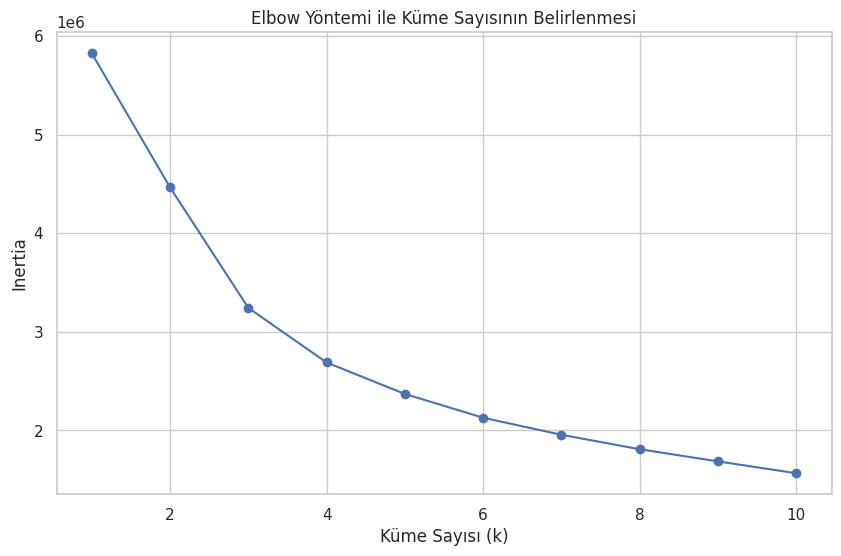

In [16]:
# Elbow Yöntemi ve Grafiği
inertia = []
K = range(1, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(coordinates_scaled)
    inertia.append(kmeans.inertia_)

# Elbow yöntemini çizdirme
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi ile Küme Sayısının Belirlenmesi')
plt.show()


# K-Means Uygulama

In [18]:
kmeans = KMeans(n_clusters=5,n_init=10, random_state=42)
df_cleaned.loc[:, 'cluster'] = kmeans.fit_predict(coordinates_scaled)


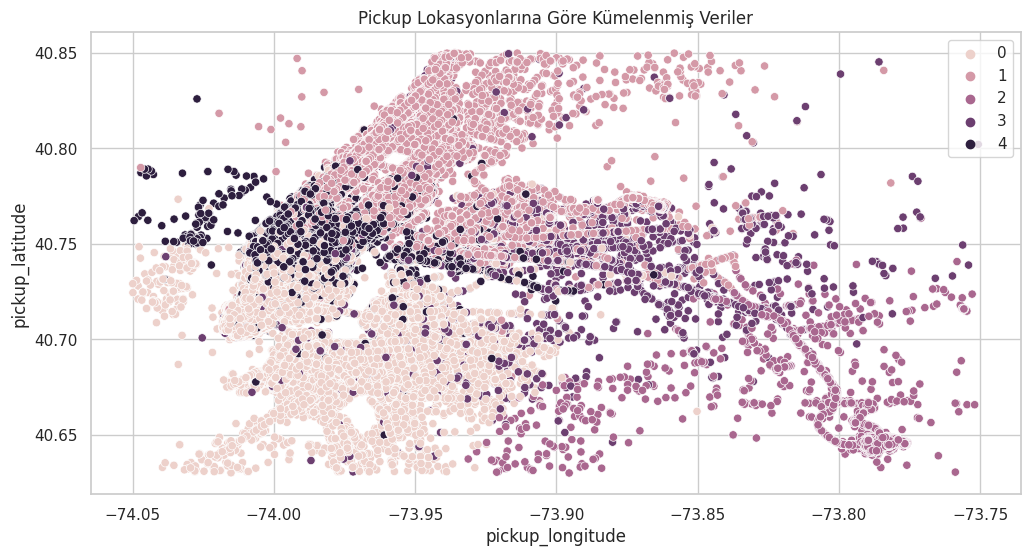

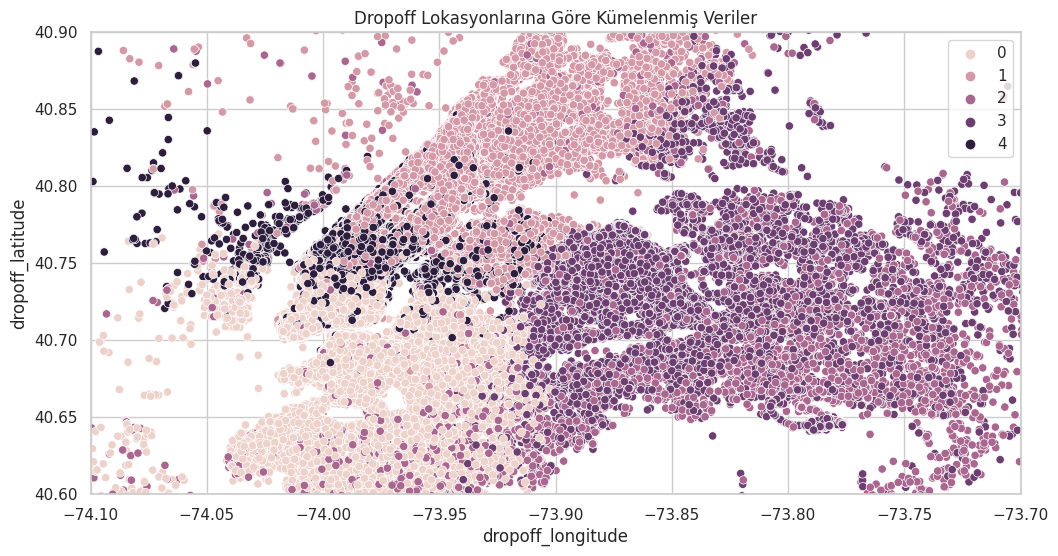

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='cluster', data=df_cleaned)
plt.title('Pickup Lokasyonlarına Göre Kümelenmiş Veriler')
plt.legend(loc='upper right') 
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='cluster', data=df_cleaned)
plt.title('Dropoff Lokasyonlarına Göre Kümelenmiş Veriler')
plt.xlim([-74.1, -73.7])  # X eksen aralığını daraltma
plt.ylim([40.6, 40.9])    # Y eksen aralığını daraltma
plt.legend(loc='upper right') 
plt.show()


# Kümelerin özelilklerini inceleyelim

In [20]:
# Her bir kümenin ortalama değerlerini inceleyelim
cluster_means = df_cleaned.groupby('cluster')[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].mean()
cluster_means


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
cluster,,,,
0,-73.993189,40.729059,-73.992821,40.721366
1,-73.957201,40.776084,-73.961896,40.779077
2,-73.785727,40.647114,-73.938974,40.731129
3,-73.963762,40.752458,-73.843756,40.726862
4,-73.983794,40.752392,-73.981561,40.754497


cluster
0    360962
1    410995
2     33165
3     47056
4    604586
Name: count, dtype: int64


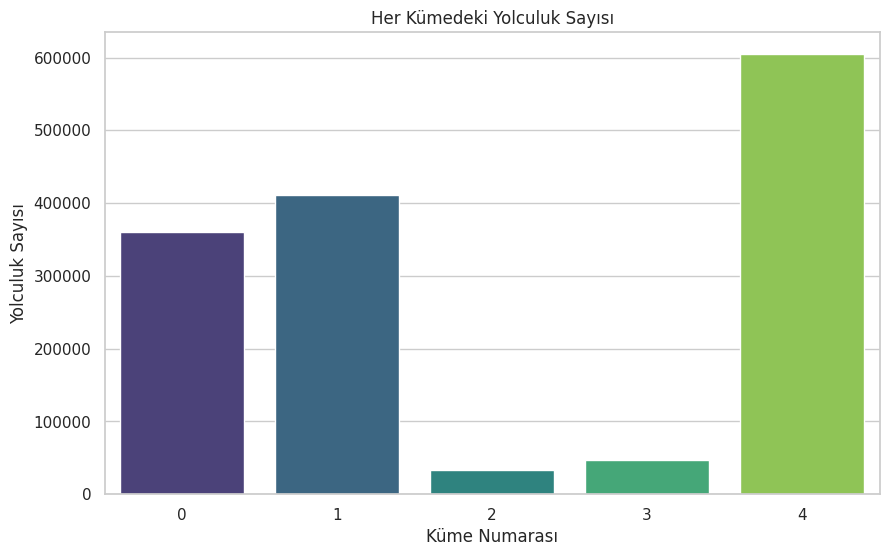

In [21]:
# Her kümenin boyutunu gösterme
cluster_sizes = df_cleaned['cluster'].value_counts().sort_index()
print(cluster_sizes)

# Küme boyutlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title("Her Kümedeki Yolculuk Sayısı")
plt.xlabel("Küme Numarası")
plt.ylabel("Yolculuk Sayısı")
plt.show()


In [24]:
# Haversine formülü ile mesafe hesaplayan fonksiyon
def haversine_distance(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    R = 6371.0  # Dünya'nın yarıçapı (km cinsinden)

    # Enlem ve boylamları radyan cinsine çevirelim
    pickup_lat = math.radians(pickup_latitude)
    pickup_lon = math.radians(pickup_longitude)
    dropoff_lat = math.radians(dropoff_latitude)
    dropoff_lon = math.radians(dropoff_longitude)

    # Enlem ve boylam farklarını hesaplayalım
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_lon - pickup_lon

    # Haversine formülünü kullanalım
    a = math.sin(dlat / 2)**2 + math.cos(pickup_lat) * math.cos(dropoff_lat) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Mesafeyi hesaplayalım
    distance = R * c
    return distance

# Mesafe hesaplamasını yeni bir sütuna ekleyelim
df_cleaned.loc[:, 'trip_distance'] = df_cleaned.apply(lambda row: haversine_distance(
    row['pickup_longitude'], row['pickup_latitude'], 
    row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Sonucu görelim
print(df_cleaned[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_distance']].head())


   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   trip_distance  
0       1.498521  
1       1.805507  
2       6.385098  
3       1.485498  
4       1.188588  


# Her Küme için Yolculuk Süresi ve Mesafe Analizi
Pickup ve dropoff lokasyonları ile birlikte yolculuk süresi ve mesafe gibi diğer faktörleri de analiz ederek her kümenin belirgin özelliklerini çıkarabiliriz.



/tmp/ipykernel_35/3267775574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['trip_duration_minutes'] = df_cleaned['trip_duration'] / 60  # Saniyeden dakikaya çevirme


         trip_duration_minutes  trip_distance
cluster                                      
0                    15.551419       3.110855
1                    14.160054       3.165030
2                    45.243499      17.001702
3                    33.978604      12.046941
4                    14.502575       2.406526


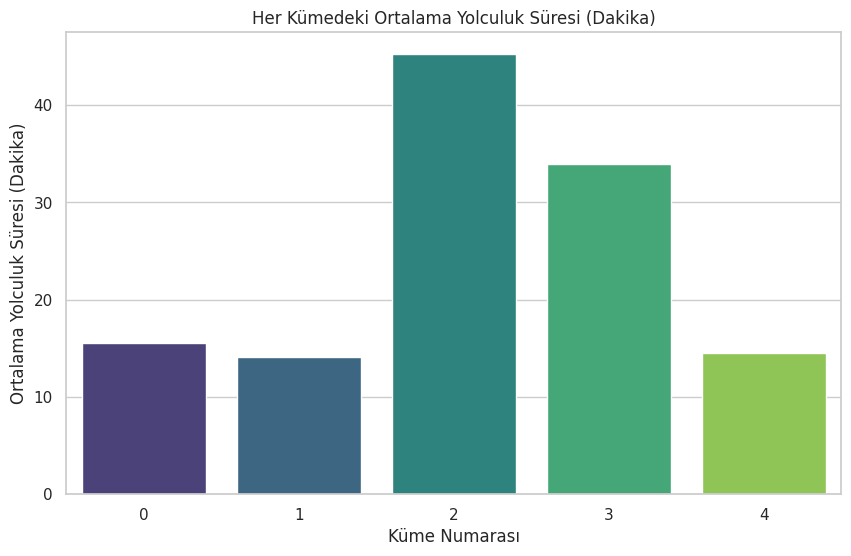

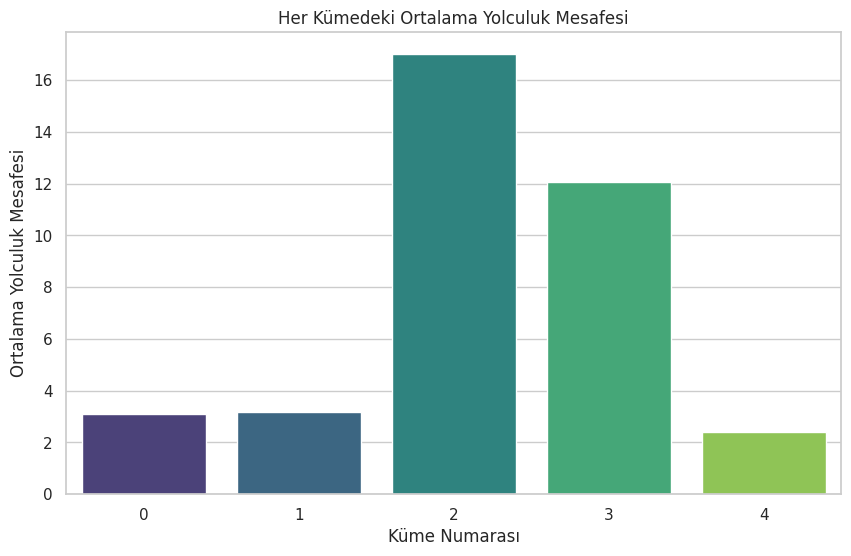

In [25]:
# Yolculuk süresi ve mesafe için her kümenin ortalama değerleri
df_cleaned['trip_duration_minutes'] = df_cleaned['trip_duration'] / 60  # Saniyeden dakikaya çevirme
cluster_stats = df_cleaned.groupby('cluster')[['trip_duration_minutes', 'trip_distance']].mean()
print(cluster_stats)

# Küme bazında yolculuk süresi ve mesafe görselleştirmesi
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_stats.index, y=cluster_stats['trip_duration_minutes'], palette='viridis')
plt.title("Her Kümedeki Ortalama Yolculuk Süresi (Dakika)")
plt.xlabel("Küme Numarası")
plt.ylabel("Ortalama Yolculuk Süresi (Dakika)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_stats.index, y=cluster_stats['trip_distance'], palette='viridis')
plt.title("Her Kümedeki Ortalama Yolculuk Mesafesi")
plt.xlabel("Küme Numarası")
plt.ylabel("Ortalama Yolculuk Mesafesi")
plt.show()


# Davies-Bouldin İndeksi
Davies-Bouldin indeksi, her kümenin diğer kümelere olan benzerliğini ölçer. Bu skorun düşük olması daha iyi bir kümeleme performansı anlamına gelir.

In [28]:
db_score = davies_bouldin_score(coordinates_scaled, df_cleaned['cluster'])
print(f"Davies-Bouldin Skoru: {db_score}")


Davies-Bouldin Skoru: 1.0851461875382402
